# Importing Dataset and required libraries

In [1]:
pwd

'C:\\Users\\Jai Bala Ji\\Desktop\\Data Science - Sukritin\\Data Science - Sukritin\\DiabetesPrediction-master\\DiabetesPrediction-master'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from time import time

In [3]:
# Importing dataset from the file diabetes_dataset.csv
df = pd.read_csv('./diabetes_dataset.csv')
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking for NULL values
df.isnull().any() 

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

 There are no null values present in the dataset,  so no cleaning of data is required.

In [5]:
#Checking size of a data
df.shape

(768, 9)

The given data has 768 rows and 9 columns

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Initializing dictionaries to store maximum and average accuracies for all the algos

In [7]:
avg_acc= dict()
max_acc= dict()

# Applying ML Algos

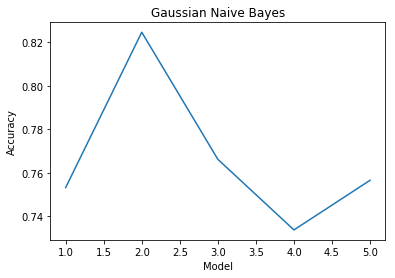

Average accuracy of GaussianNaiveBayes algo is 76.69002 and maximum accuracy is 82.46753


In [8]:
#Performing Gaussian Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()


#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]

#Creating data on random bases.
#xtrain_6,xtest_6,ytrain_6,ytest_6 = train_test_split(df.iloc[:,:8],df.iloc[:,8:],test_size = 0.2, shuffle=True)

#Creating model
GNB_1 = GNB.fit(xtrain_1,ytrain_1.values.ravel())
GNB_2 = GNB.fit(xtrain_2,ytrain_2.values.ravel())
GNB_3 = GNB.fit(xtrain_3,ytrain_3.values.ravel())
GNB_4 = GNB.fit(xtrain_4,ytrain_4.values.ravel())
GNB_5 = GNB.fit(xtrain_5,ytrain_5.values.ravel())
#GNB_6 = GNB.fit(xtrain_6,ytrain_6.values.ravel())

#Predicting values using trained model
pred1 = GNB_1.predict(xtest_1)
pred2 = GNB_2.predict(xtest_2)
pred3 = GNB_3.predict(xtest_3)
pred4 = GNB_4.predict(xtest_4)
pred5 = GNB_5.predict(xtest_5)
#pred6 = GNB_6.predict(xtest_6)

#Calculating accuracy of a model
accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)
#accuracy_6 = accuracy_score(y_true= ytest_6,  y_pred=pred6)

#Plotting accuracy graph
plt.plot(range(1, 6) ,[accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Gaussian Naive Bayes')
plt.show() 

#Calculating avg. accuracy
avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
avg_acc['GaussianNB']=avg_accuracy*100
max_acc['GaussianNB']=max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100
print('Average accuracy of GaussianNaiveBayes algo is %.5f and maximum accuracy is %.5f'%(avg_accuracy*100, max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100))

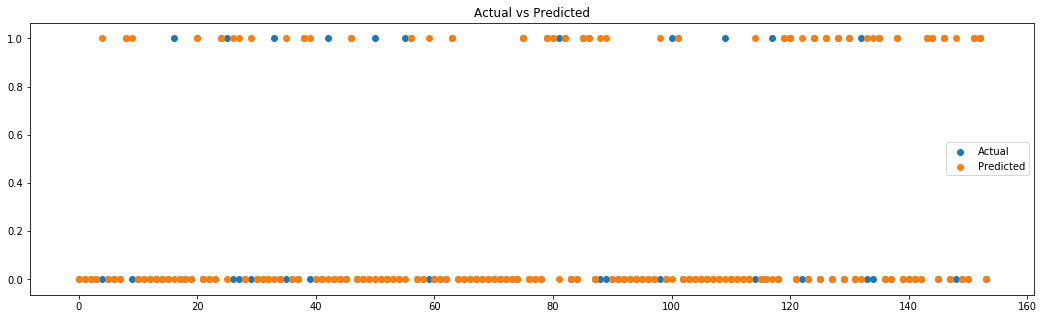

In [9]:
#Plotting Actual and Predicted values
plt.figure(figsize=(18, 5))
plt.scatter(range(0,154),ytest_2)
plt.scatter(range(0,154), pred2)
plt.legend(['Actual','Predicted']) 
plt.title('Actual vs Predicted')
plt.show() 

The scatterplot shows the plotting of actual and predicted values from the model. The values that are true are represented by orange overlapped over blue and those values which are not overlapped by blue are predicted falsely. 
The average accuracy of a Gaussian Naive Bayes model is 76.69002.
The maximum accuracy is given by model 2 as can be seen from graph.

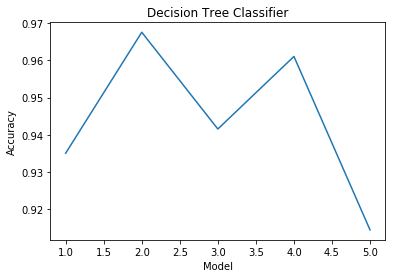

Average accuracy of DecisionTreeClassifier algo is 94.39337 and maximum accuracy is 96.75325


In [10]:
#Performing Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()


#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]

#Creating data on random bases.
xtrain_6,xtest_6,ytrain_6,ytest_6 = train_test_split(df.iloc[:,:8],df.iloc[:,8:],test_size = 0.2, shuffle=True)

#Creating model
DTC_1 = DTC.fit(xtrain_1,ytrain_1.values.ravel())
DTC_2 = DTC.fit(xtrain_2,ytrain_2.values.ravel())
DTC_3 = DTC.fit(xtrain_3,ytrain_3.values.ravel())
DTC_4 = DTC.fit(xtrain_4,ytrain_4.values.ravel())
DTC_5 = DTC.fit(xtrain_5,ytrain_5.values.ravel())
DTC_6 = DTC.fit(xtrain_6,ytrain_6.values.ravel())

#Predicting values using trained model
pred1 = DTC_1.predict(xtest_1)
pred2 = DTC_2.predict(xtest_2)
pred3 = DTC_3.predict(xtest_3)
pred4 = DTC_4.predict(xtest_4)
pred5 = DTC_5.predict(xtest_5)
pred6 = DTC_6.predict(xtest_6)

#Calculating accuracy of a model
accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)
accuracy_6 = accuracy_score(y_true= ytest_6,  y_pred=pred6)

#Plotting accuracy graph
plt.plot(range(1, 6),[accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier')
plt.show() 

#Calculating avg. accuracy
avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
avg_acc['DecisionTreeClassifier']=avg_accuracy*100
max_acc['DecisionTreeClassifier']=max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100
print('Average accuracy of DecisionTreeClassifier algo is %.5f and maximum accuracy is %.5f'%(avg_accuracy*100, max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100))

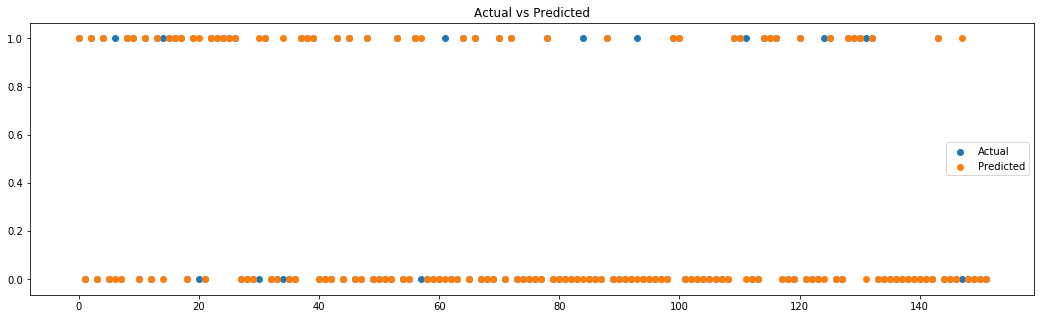

In [11]:
#Plotting Actual and Predicted values
plt.figure(figsize=(18, 5))
plt.scatter(range(0,152),ytest_5)
plt.scatter(range(0,152), pred5)
plt.legend(['Actual','Predicted']) 
plt.title('Actual vs Predicted')
plt.show() 

The scatterplot shows the plotting of actual and predicted values from the model. The values that are true are represented by orange overlapped over blue and those values which are not overlapped by blue are predicted falsely. 
The average accuracy of a Decision Tree model is 94.27546.
The maximum accuracy is given by model 5 as can be seen from graph.

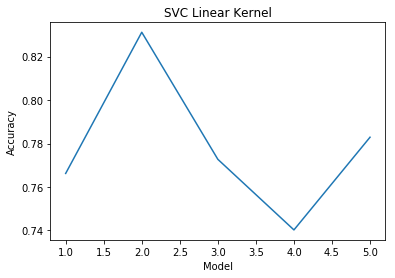

Average accuracy of SVC Linear Kernel algo is 77.86569 and maximum accuracy is 83.11688


In [12]:
#Performing Support Vector Classifier Algorithm with Linear Kernel
from sklearn.svm import SVC
SVC = SVC(kernel = 'linear',gamma = 'auto')


#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]

#Creating data on random bases.
xtrain_6,xtest_6,ytrain_6,ytest_6 = train_test_split(df.iloc[:,:8],df.iloc[:,8:],test_size = 0.2, shuffle=True)

#Creating model
SVC_1 = SVC.fit(xtrain_1,ytrain_1.values.ravel())
SVC_2 = SVC.fit(xtrain_2,ytrain_2.values.ravel())
SVC_3 = SVC.fit(xtrain_3,ytrain_3.values.ravel())
SVC_4 = SVC.fit(xtrain_4,ytrain_4.values.ravel())
SVC_5 = SVC.fit(xtrain_5,ytrain_5.values.ravel())
SVC_6 = SVC.fit(xtrain_6,ytrain_6.values.ravel())

#Predicting values using trained model
pred1 = SVC_1.predict(xtest_1)
pred2 = SVC_2.predict(xtest_2)
pred3 = SVC_3.predict(xtest_3)
pred4 = SVC_4.predict(xtest_4)
pred5 = SVC_5.predict(xtest_5)
pred6 = SVC_6.predict(xtest_6)

#Calculating accuracy of a model
accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)
accuracy_6 = accuracy_score(y_true= ytest_6,  y_pred=pred6)

#Plotting accuracy graph
plt.plot(range(1, 6), [accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('SVC Linear Kernel')
plt.show() 

#Calculating avg. accuracy
avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
avg_acc['SVC Linear Kernel']=avg_accuracy*100
max_acc['SVC Linear Kernel']=max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100
print('Average accuracy of SVC Linear Kernel algo is %.5f and maximum accuracy is %.5f'%(avg_accuracy*100, max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100))

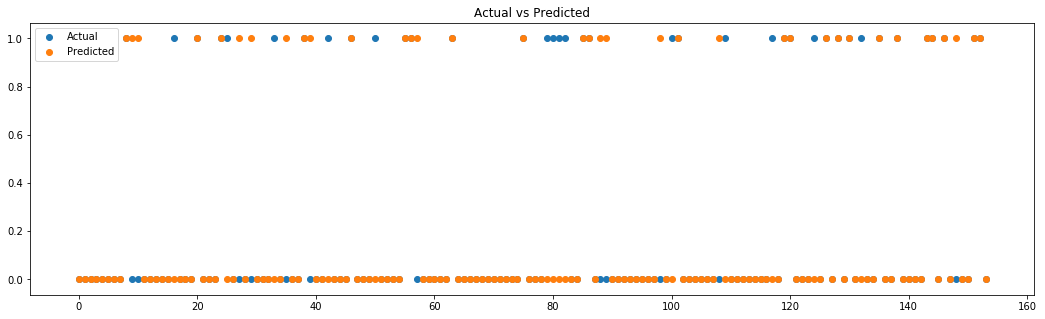

In [13]:
#Plotting Actual and Predicted values
plt.figure(figsize=(18, 5))
plt.scatter(range(0,154),ytest_2)
plt.scatter(range(0,154), pred2)
plt.legend(['Actual','Predicted']) 
plt.title('Actual vs Predicted')
plt.show() 

The scatterplot shows the plotting of actual and predicted values from the model. The values that are true are represented by orange overlapped over blue and those values which are not overlapped by blue are predicted falsely. 
The average accuracy of a SVC Linear Kernel model is 77.86569.
The maximum accuracy is given by model 2 as can be seen from graph.

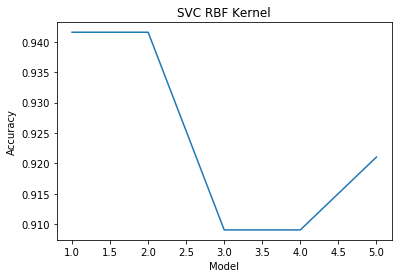

Time:  1.635361671447754
Average accuracy of SVC RBF Kernel algo is 92.44703 and maximum accuracy is 94.15584


In [14]:
#Performing Support Vector Classifier Algorithm with RBF Kernel
from sklearn.svm import SVC
SVC = SVC(kernel = 'rbf',gamma ='auto')


#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]

#Creating data on random bases.
xtrain_6,xtest_6,ytrain_6,ytest_6 = train_test_split(df.iloc[:,:8],df.iloc[:,8:],test_size = 0.2, shuffle=True)

#Calculating time taken in training and predicting model
start = time() 

#Creating model
SVC_1 = SVC.fit(xtrain_1,ytrain_1.values.ravel())
SVC_2 = SVC.fit(xtrain_2,ytrain_2.values.ravel())
SVC_3 = SVC.fit(xtrain_3,ytrain_3.values.ravel())
SVC_4 = SVC.fit(xtrain_4,ytrain_4.values.ravel())
SVC_5 = SVC.fit(xtrain_5,ytrain_5.values.ravel())
SVC_6 = SVC.fit(xtrain_6,ytrain_6.values.ravel())

#Predicting values using trained model
pred1 = SVC_1.predict(xtest_1)
pred2 = SVC_2.predict(xtest_2)
pred3 = SVC_3.predict(xtest_3)
pred4 = SVC_4.predict(xtest_4)
pred5 = SVC_5.predict(xtest_5)
pred6 = SVC_6.predict(xtest_6)

#Calculating accuracy of a model
accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)
accuracy_6 = accuracy_score(y_true= ytest_6,  y_pred=pred6)

#Plotting accuracy graph
plt.plot(range(1, 6),[accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('SVC RBF Kernel')
plt.show() 

#Calculating avg. accuracy
avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
avg_acc['SVC RBF Kernel']=avg_accuracy*100
max_acc['SVC RBF Kernel']=max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100
print('Time: ',time()-start)
print('Average accuracy of SVC RBF Kernel algo is %.5f and maximum accuracy is %.5f'%(avg_accuracy*100, max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100))

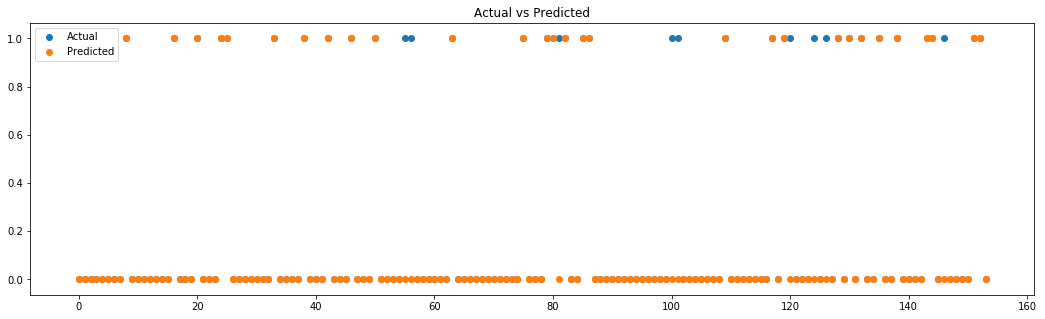

In [15]:
#Plotting Actual and Predicted values
plt.figure(figsize=(18, 5))
plt.scatter(range(0,154),ytest_2)
plt.scatter(range(0,154), pred2)
plt.legend(['Actual','Predicted']) 
plt.title('Actual vs Predicted')
plt.show() 

The scatterplot shows the plotting of actual and predicted values from the model. The values that are true are represented by orange overlapped over blue and those values which are not overlapped by blue are predicted falsely. 
The average accuracy of a SVC RBF Kernel model is 92.44703.
The maximum accuracy is given by model 2 as can be seen from graph.

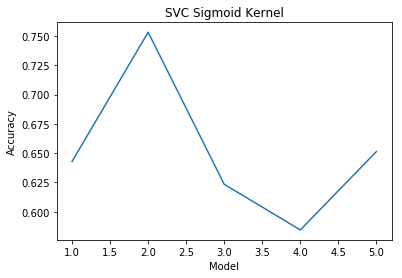

Time:  1.1157312393188477
Average accuracy of SVC Sigmoid Kernel algo is 65.10424 and maximum accuracy is 75.32468


In [16]:
#Performing Support Vector Classifier Algorithm with Sigmoid Kernel
from sklearn.svm import SVC
SVC = SVC(kernel = 'sigmoid',gamma ='auto')


#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]

#Creating data on random bases.
xtrain_6,xtest_6,ytrain_6,ytest_6 = train_test_split(df.iloc[:,:8],df.iloc[:,8:],test_size = 0.2, shuffle=True)

#Calculating time taken in training and predicting model
start = time() 

#Creating model
SVC_1 = SVC.fit(xtrain_1,ytrain_1.values.ravel())
SVC_2 = SVC.fit(xtrain_2,ytrain_2.values.ravel())
SVC_3 = SVC.fit(xtrain_3,ytrain_3.values.ravel())
SVC_4 = SVC.fit(xtrain_4,ytrain_4.values.ravel())
SVC_5 = SVC.fit(xtrain_5,ytrain_5.values.ravel())
SVC_6 = SVC.fit(xtrain_6,ytrain_6.values.ravel())

#Predicting values using trained model
pred1 = SVC_1.predict(xtest_1)
pred2 = SVC_2.predict(xtest_2)
pred3 = SVC_3.predict(xtest_3)
pred4 = SVC_4.predict(xtest_4)
pred5 = SVC_5.predict(xtest_5)
pred6 = SVC_6.predict(xtest_6)

#Calculating accuracy of a model
accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)
accuracy_6 = accuracy_score(y_true= ytest_6,  y_pred=pred6)

#Plotting accuracy graph
plt.plot(range(1, 6),[accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('SVC Sigmoid Kernel')
plt.show() 

#Calculating avg. accuracy
avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
avg_acc['SVC Sigmoid Kernel']=avg_accuracy*100
max_acc['SVC Sigmoid Kernel']=max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100
print('Time: ',time()-start)
print('Average accuracy of SVC Sigmoid Kernel algo is %.5f and maximum accuracy is %.5f'%(avg_accuracy*100, max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100))

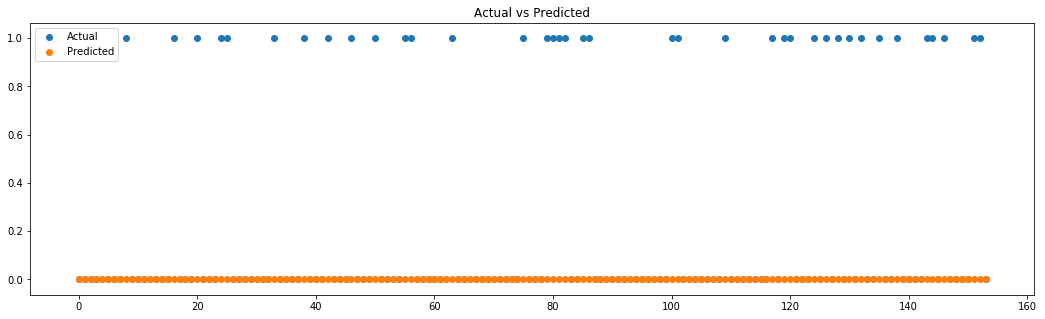

In [17]:
#Plotting Actual and Predicted values
plt.figure(figsize=(18, 5))
plt.scatter(range(0,154),ytest_2)
plt.scatter(range(0,154), pred2)
plt.legend(['Actual','Predicted']) 
plt.title('Actual vs Predicted')
plt.show() 

The scatterplot shows the plotting of actual and predicted values from the model. The values that are true are represented by orange overlapped over blue and those values which are not overlapped by blue are predicted falsely. 
The average accuracy of a SVC Sigmoid Kernel model is 65.10424.
The maximum accuracy is given by model 2 as can be seen from graph.

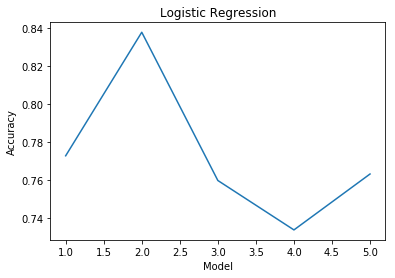

Time:  1.4828691482543945
Average accuracy of Logistic Regression algo with newton-cg solver is 77.34108 and maximum accuracy is 83.76623


In [18]:
#Performing Logistic Regression Algorithm  with newton-cg solver
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='newton-cg')


#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]

#Creating data on random bases.
xtrain_6,xtest_6,ytrain_6,ytest_6 = train_test_split(df.iloc[:,:8],df.iloc[:,8:],test_size = 0.2, shuffle=True)

#Calculating time taken in training and predicting model
start = time() 

#Creating model
LR_1 = LR.fit(xtrain_1,ytrain_1.values.ravel())
LR_2 = LR.fit(xtrain_2,ytrain_2.values.ravel())
LR_3 = LR.fit(xtrain_3,ytrain_3.values.ravel())
LR_4 = LR.fit(xtrain_4,ytrain_4.values.ravel())
LR_5 = LR.fit(xtrain_5,ytrain_5.values.ravel())
LR_6 = LR.fit(xtrain_6,ytrain_6.values.ravel())

#Predicting values using trained model
pred1 = LR_1.predict(xtest_1)
pred2 = LR_2.predict(xtest_2)
pred3 = LR_3.predict(xtest_3)
pred4 = LR_4.predict(xtest_4)
pred5 = LR_5.predict(xtest_5)
pred6 = LR_6.predict(xtest_6)

#Calculating accuracy of a model
accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)
accuracy_6 = accuracy_score(y_true= ytest_6,  y_pred=pred6)

#Plotting accuracy graph
plt.plot(range(1, 6), [accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.show() 

#Calculating avg. accuracy
avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
avg_acc['Logistic Regression newton-cg']=avg_accuracy*100
max_acc['Logistic Regression newton-cg']=max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100
print('Time: ',time()-start)
print('Average accuracy of Logistic Regression algo with newton-cg solver is %.5f and maximum accuracy is %.5f'%(avg_accuracy*100, max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100))

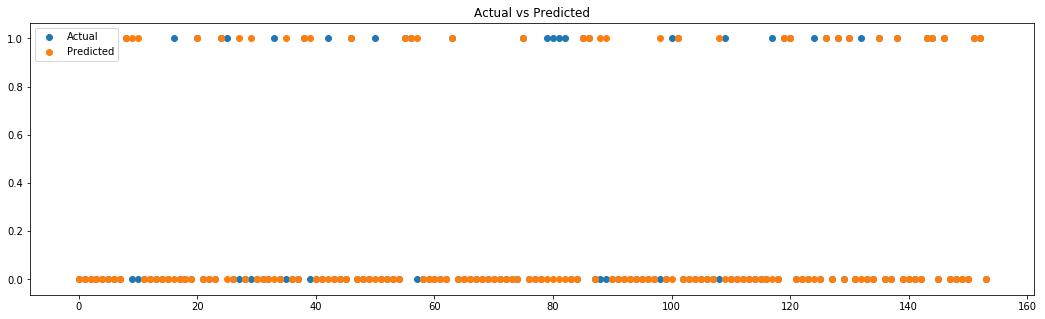

In [19]:
#Plotting Actual and Predicted values
plt.figure(figsize=(18, 5))
plt.scatter(range(0,154),ytest_2)
plt.scatter(range(0,154), pred2)
plt.legend(['Actual','Predicted']) 
plt.title('Actual vs Predicted')
plt.show() 

The scatterplot shows the plotting of actual and predicted values from the model. The values that are true are represented by orange overlapped over blue and those values which are not overlapped by blue are predicted falsely. 
The average accuracy of a Logistic Regression newton-cg model is 77.34108.
The maximum accuracy is given by model 2 as can be seen from graph.

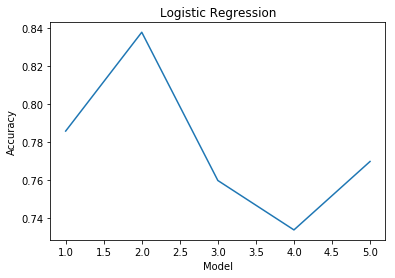

Time:  1.121166706085205
Average accuracy of Logistic Regression algo with lbfgs solver is 77.73240 and maximum accuracy is 83.76623


In [20]:
#Performing Logistic Regression Algorithm  with lbfgs solver
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs')


#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]

#Creating data on random bases.
xtrain_6,xtest_6,ytrain_6,ytest_6 = train_test_split(df.iloc[:,:8],df.iloc[:,8:],test_size = 0.2, shuffle=True)

#Calculating time taken in training and predicting model
start = time() 

#Creating model
LR_1 = LR.fit(xtrain_1,ytrain_1.values.ravel())
LR_2 = LR.fit(xtrain_2,ytrain_2.values.ravel())
LR_3 = LR.fit(xtrain_3,ytrain_3.values.ravel())
LR_4 = LR.fit(xtrain_4,ytrain_4.values.ravel())
LR_5 = LR.fit(xtrain_5,ytrain_5.values.ravel())
LR_6 = LR.fit(xtrain_6,ytrain_6.values.ravel())

#Predicting values using trained model
pred1 = LR_1.predict(xtest_1)
pred2 = LR_2.predict(xtest_2)
pred3 = LR_3.predict(xtest_3)
pred4 = LR_4.predict(xtest_4)
pred5 = LR_5.predict(xtest_5)
pred6 = LR_6.predict(xtest_6)

#Calculating accuracy of a model
accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)
accuracy_6 = accuracy_score(y_true= ytest_6,  y_pred=pred6)

#Plotting accuracy graph
plt.plot(range(1, 6), [accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.show() 

#Calculating avg. accuracy
avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
avg_acc['Logistic Regression lbfgs']=avg_accuracy*100
max_acc['Logistic Regression lbfgs']=max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100
print('Time: ',time()-start)
print('Average accuracy of Logistic Regression algo with lbfgs solver is %.5f and maximum accuracy is %.5f'%(avg_accuracy*100, max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100))

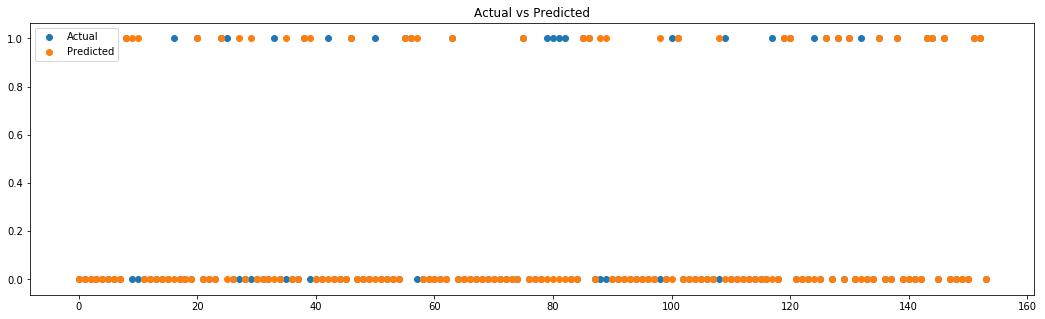

In [21]:
#Plotting Actual and Predicted values
plt.figure(figsize=(18, 5))
plt.scatter(range(0,154),ytest_2)
plt.scatter(range(0,154), pred2)
plt.legend(['Actual','Predicted']) 
plt.title('Actual vs Predicted')
plt.show() 

The scatterplot shows the plotting of actual and predicted values from the model. The values that are true are represented by orange overlapped over blue and those values which are not overlapped by blue are predicted falsely. 
The average accuracy of a Logistic Regression lbfgs model is 77.73240.
The maximum accuracy is given by model 2 as can be seen from graph.

c:\users\jai bala ji\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


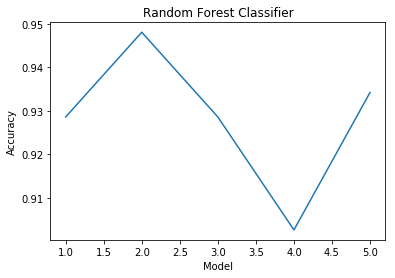

Time:  1.0911712646484375
Average accuracy of Random Forest Classifier algo  is 92.84005 and maximum accuracy is 94.80519


In [22]:
#Performing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()


#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]

#Creating data on random bases.
xtrain_6,xtest_6,ytrain_6,ytest_6 = train_test_split(df.iloc[:,:8],df.iloc[:,8:],test_size = 0.2, shuffle=True)

#Calculating time taken in training and predicting model
start = time() 

#Creating model
RFC_1 = RFC.fit(xtrain_1,ytrain_1.values.ravel())
RFC_2 = RFC.fit(xtrain_2,ytrain_2.values.ravel())
RFC_3 = RFC.fit(xtrain_3,ytrain_3.values.ravel())
RFC_4 = RFC.fit(xtrain_4,ytrain_4.values.ravel())
RFC_5 = RFC.fit(xtrain_5,ytrain_5.values.ravel())
RFC_6 = RFC.fit(xtrain_6,ytrain_6.values.ravel())

#Predicting values using trained model
pred1 = RFC_1.predict(xtest_1)
pred2 = RFC_2.predict(xtest_2)
pred3 = RFC_3.predict(xtest_3)
pred4 = RFC_4.predict(xtest_4)
pred5 = RFC_5.predict(xtest_5)
pred6 = RFC_6.predict(xtest_6)

#Calculating accuracy of a model
accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)
accuracy_6 = accuracy_score(y_true= ytest_6,  y_pred=pred6)

#Plotting accuracy graph
plt.plot(range(1, 6) ,[accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier')
plt.show() 

#Calculating avg. accuracy
avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
avg_acc['Random Forest Classifier']=avg_accuracy*100
max_acc['Random Forest Classifier']=max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100
print('Time: ',time()-start)
print('Average accuracy of Random Forest Classifier algo  is %.5f and maximum accuracy is %.5f'%(avg_accuracy*100, max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100))

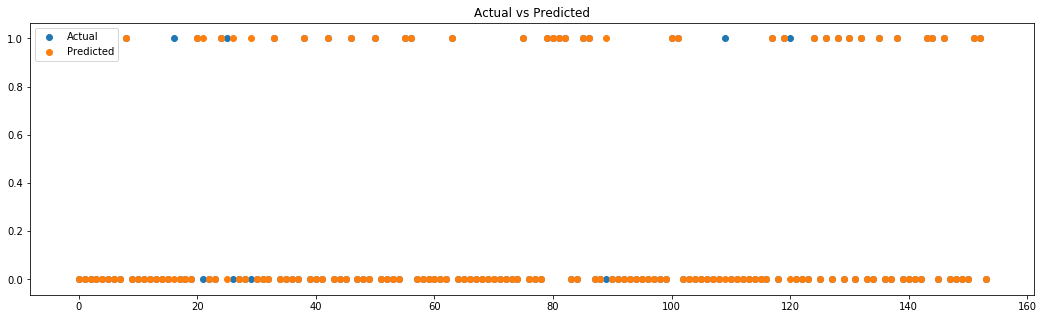

In [23]:
#Plotting Actual and Predicted values
plt.figure(figsize=(18, 5))
plt.scatter(range(0,154),ytest_2)
plt.scatter(range(0,154), pred2)
plt.legend(['Actual','Predicted']) 
plt.title('Actual vs Predicted')
plt.show() 

The scatterplot shows the plotting of actual and predicted values from the model. The values that are true are represented by orange overlapped over blue and those values which are not overlapped by blue are predicted falsely. 
The average accuracy of a Random Forest Classifier model is 92.84005.
The maximum accuracy is given by model 2 as can be seen from graph.

Time:  0.6862101554870605


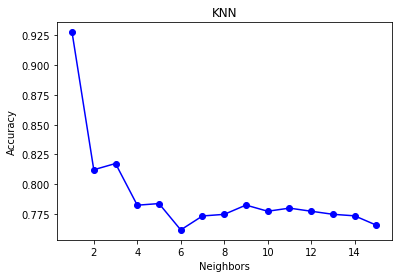

In [24]:
#Performing KNN
from sklearn.neighbors import KNeighborsClassifier

#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]


#Calculating time taken in training and predicting model
start = time() 
acc = []
for i in range(1, 16):
  KNN = KNeighborsClassifier(n_neighbors=i)

  #Creating model
  KNN_1 = KNN.fit(xtrain_1,ytrain_1.values.ravel())
  KNN_2 = KNN.fit(xtrain_2,ytrain_2.values.ravel())
  KNN_3 = KNN.fit(xtrain_3,ytrain_3.values.ravel())
  KNN_4 = KNN.fit(xtrain_4,ytrain_4.values.ravel())
  KNN_5 = KNN.fit(xtrain_5,ytrain_5.values.ravel())
  
  #Predicting values using trained model
  pred1 = KNN_1.predict(xtest_1)
  pred2 = KNN_2.predict(xtest_2)
  pred3 = KNN_3.predict(xtest_3)
  pred4 = KNN_4.predict(xtest_4)
  pred5 = KNN_5.predict(xtest_5)

  #Calculating accuracy of a model
  accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
  accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
  accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
  accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
  accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)

  #Calculating avg. accuracy
  avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
  acc.append(avg_accuracy)
print('Time: ',time()-start)
plt.plot(range(1, 16) ,acc,'bo-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.show() 

As it can be clearly seen from above graph the maximum accuracy is given when value of k = 1

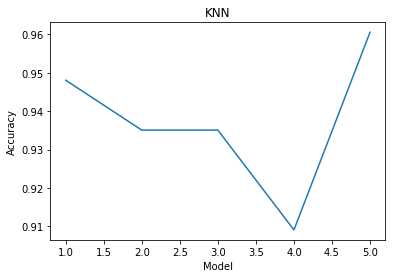

Time:  0.6387274265289307
Average accuracy of KNN algo  is 93.75598 and maximum accuracy is 96.05263


In [25]:
#Performing KNN
from sklearn.neighbors import KNeighborsClassifier



#Splitting given data in Train data.
xtrain_1,ytrain_1 = df.iloc[ :614, :8], df.iloc[ :614 , 8:]
xtrain_2,ytrain_2 = df.iloc[ :460, :8].append(df.iloc[614:, :8]), df.iloc[:460 , 8:].append(df.iloc[614:, 8:])
xtrain_3,ytrain_3 = df.iloc[ :306, :8].append(df.iloc[460:, :8]), df.iloc[:306 , 8:].append(df.iloc[460:, 8:])
xtrain_4,ytrain_4 = df.iloc[ :152, :8].append(df.iloc[306:, :8]), df.iloc[:152 , 8:].append(df.iloc[306:, 8:])
xtrain_5,ytrain_5 = df.iloc[152 :, :8], df.iloc[152 : , 8:]

#Splitting data into Test data. 
xtest_1,ytest_1 = df.iloc[614: , :8],df.iloc[614: , 8:]
xtest_2,ytest_2 = df.iloc[ 460:614, :8], df.iloc[460:614 , 8:]
xtest_3,ytest_3 = df.iloc[ 306:460, :8], df.iloc[306:460 , 8:]
xtest_4,ytest_4 = df.iloc[ 152:306, :8], df.iloc[152:306 , 8:]
xtest_5,ytest_5 = df.iloc[ :152, :8], df.iloc[ :152 , 8:]

#Creating data on random bases.
xtrain_6,xtest_6,ytrain_6,ytest_6 = train_test_split(df.iloc[:,:8],df.iloc[:,8:],test_size = 0.2, shuffle=True)

#Calculating time taken in training and predicting model
start = time() 
KNN = KNeighborsClassifier(n_neighbors=1)

#Creating model
KNN_1 = KNN.fit(xtrain_1,ytrain_1.values.ravel())
KNN_2 = KNN.fit(xtrain_2,ytrain_2.values.ravel())
KNN_3 = KNN.fit(xtrain_3,ytrain_3.values.ravel())
KNN_4 = KNN.fit(xtrain_4,ytrain_4.values.ravel())
KNN_5 = KNN.fit(xtrain_5,ytrain_5.values.ravel())
KNN_6 = KNN.fit(xtrain_6,ytrain_6.values.ravel())

#Predicting values using trained model
pred1 = KNN_1.predict(xtest_1)
pred2 = KNN_2.predict(xtest_2)
pred3 = KNN_3.predict(xtest_3)
pred4 = KNN_4.predict(xtest_4)
pred5 = KNN_5.predict(xtest_5)
pred6 = KNN_6.predict(xtest_6)

#Calculating accuracy of a model
accuracy_1 = accuracy_score(y_true= ytest_1,  y_pred=pred1)
accuracy_2 = accuracy_score(y_true= ytest_2,  y_pred=pred2)
accuracy_3 = accuracy_score(y_true= ytest_3,  y_pred=pred3)
accuracy_4 = accuracy_score(y_true= ytest_4,  y_pred=pred4)
accuracy_5 = accuracy_score(y_true= ytest_5,  y_pred=pred5)
accuracy_6 = accuracy_score(y_true= ytest_6,  y_pred=pred6)

#Plotting accuracy graph
plt.plot(range(1,6),[accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.show() 

#Calculating avg. accuracy
avg_accuracy = sum([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])/5
avg_acc['KNN']=avg_accuracy*100
max_acc['KNN']=max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100
print('Time: ',time()-start)
print('Average accuracy of KNN algo  is %.5f and maximum accuracy is %.5f'%(avg_accuracy*100, max([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5])*100))

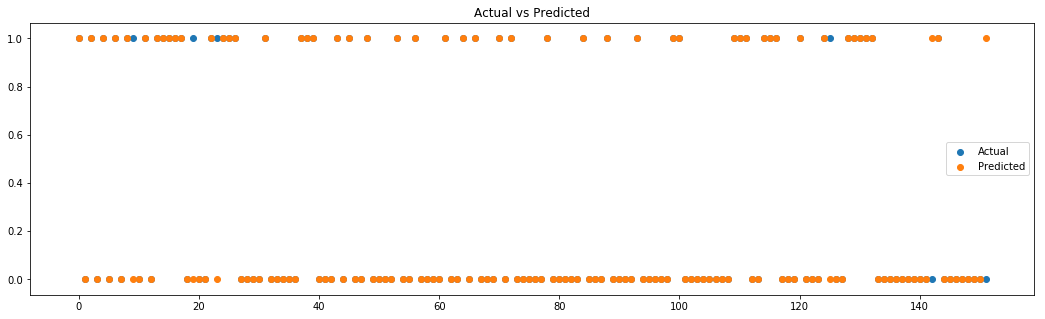

In [26]:
#Plotting Actual and Predicted values
plt.figure(figsize=(18, 5))
plt.scatter(range(0,152),ytest_5)
plt.scatter(range(0,152), pred5)
plt.legend(['Actual','Predicted']) 
plt.title('Actual vs Predicted')
plt.show() 

The scatterplot shows the plotting of actual and predicted values from the model. The values that are true are represented by orange overlapped over blue and those values which are not overlapped by blue are predicted falsely. 
The average accuracy of a Gaussian Naive Bayes model is 93.75598.
The maximum accuracy is given by model 5 as can be seen from graph.

In [27]:
#Printing the no of algos that we perform and and their names. 
print('No of algos used:',len(avg_acc))
print('Name of algos used:',sorted(avg_acc))

No of algos used: 9
Name of algos used: ['DecisionTreeClassifier', 'GaussianNB', 'KNN', 'Logistic Regression lbfgs', 'Logistic Regression newton-cg', 'Random Forest Classifier', 'SVC Linear Kernel', 'SVC RBF Kernel', 'SVC Sigmoid Kernel']


In [28]:
# Printing the dictionaries having average accuracies
print(sorted(avg_acc.items(), key = lambda x : x[1], reverse = True))

[('DecisionTreeClassifier', 94.39336978810664), ('KNN', 93.75598086124401), ('Random Forest Classifier', 92.84005468215994), ('SVC RBF Kernel', 92.44702665755298), ('SVC Linear Kernel', 77.8656869446343), ('Logistic Regression lbfgs', 77.7323991797676), ('Logistic Regression newton-cg', 77.34107997265892), ('GaussianNB', 76.69002050580997), ('SVC Sigmoid Kernel', 65.10423786739577)]


##### As it can be clearly seen from above dictionary that on average of 6 model Decision Tree Algorithm gives its best performance of 94.39%.

In [29]:
# Printing the dictionaries having maximum accuracies
print(sorted(max_acc.items(), key = lambda x : x[1], reverse = True))

[('DecisionTreeClassifier', 96.75324675324676), ('KNN', 96.05263157894737), ('Random Forest Classifier', 94.8051948051948), ('SVC RBF Kernel', 94.15584415584416), ('Logistic Regression newton-cg', 83.76623376623377), ('Logistic Regression lbfgs', 83.76623376623377), ('SVC Linear Kernel', 83.11688311688312), ('GaussianNB', 82.46753246753246), ('SVC Sigmoid Kernel', 75.32467532467533)]


##### As it can be clearly seen from above dictionary that on max of 6 model Decision Tree Classifier Algorithm gives its best performance of  on maximum accuracy of 96.75%.